In [91]:
#import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import random
%matplotlib inline

In [3]:
#import orders data frame
orders = pd.read_csv("./data/Orders.csv")

Problem 1: Check Sales and Profit columns, convert them to numeric type

In [49]:
orders.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority
0,40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,$221.98,2,0.0,$62.15,40.77,High
1,26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black","$3,709.40",9,0.1,-$288.77,923.63,Critical
2,25330,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID","$5,175.17",9,0.1,$919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,1/28/14,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless","$2,892.51",5,0.1,-$96.54,910.16,Medium
4,47221,SG-2014-RH9495111-41948,11/5/14,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed","$2,832.96",8,0.0,$311.52,903.04,Critical


In [4]:
orders.Sales = orders.Sales.str.replace('[$,]', '').astype('float')

In [5]:
orders.Profit = orders.Profit.str.replace('[$,]', '').astype('float')

In [6]:
orders.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority
0,40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High
1,26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,Critical
2,25330,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,1/28/14,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.16,Medium
4,47221,SG-2014-RH9495111-41948,11/5/14,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.04,Critical


Convert the Date columns to datetime objects

In [7]:
orders['Order.Date'] = pd.to_datetime(orders['Order.Date'])

In [8]:
orders['Ship.Date'] = pd.to_datetime(orders['Ship.Date']) 

In [10]:
plot1 = orders[['Order.Date', 'Quantity']].groupby('Order.Date').sum()

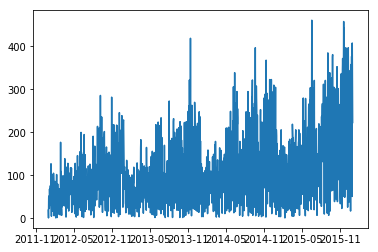

In [11]:
plt.plot(plot1)

The graph definitely show an increase in inventory in the winter months. Also, sales have been increasing between 2011-2015

In [9]:
plot2 = orders[['Order.Date', 'Category', 'Quantity']].groupby(['Category', 'Order.Date']).sum()

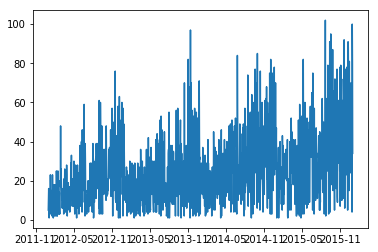

In [32]:
#Plot of furniture
plt.plot(plot2.loc[plot2.index.levels[0][0]])


Plot of Seasonal trend for furniture

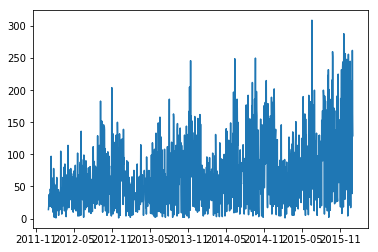

In [34]:
#plot of office supplies
plt.plot(plot2.loc[plot2.index.levels[0][1]])

Plot of seasonal trend for office supplies

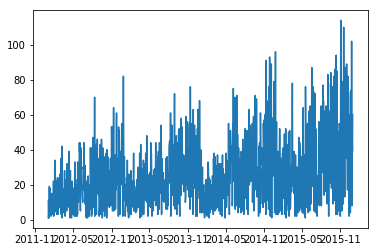

In [36]:
#plot of technolocy
plt.plot(plot2.loc[plot2.index.levels[0][2]])

Plot of seasonal trend for techonology

In [11]:
#import returns data frame
returns = pd.read_csv('./data/Returns.csv')
returns.head()

,Returned,Order ID,Region
0,Yes,CA-2012-SA20830140-41210,Central US
1,Yes,IN-2012-PB19210127-41259,Eastern Asia
2,Yes,CA-2012-SC20095140-41174,Central US
3,Yes,IN-2015-JH158207-42140,Oceania
4,Yes,IN-2014-LC168857-41747,Oceania


In [12]:
returns.columns = ['Returned', 'Order.ID', 'Region']

In [13]:
retOrd = pd.merge(orders, returns, how = 'left', on = 'Order.ID')

In [50]:
returns.Returned.unique()

array(['Yes'], dtype=object)

In [14]:
retOrd.Returned.loc[retOrd.Returned.isna()] = list(map(lambda x: 'No', retOrd.Returned.loc[retOrd.Returned.isna()]))

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [52]:
retOrd.Returned

0         No
1         No
2         No
3         No
4         No
5         No
6         No
7         No
8         No
9         No
10        No
11        No
12        No
13        No
14        No
15        No
16        No
17        No
18        No
19        No
20        No
21        No
22        No
23        No
24        No
25        No
26       Yes
27        No
28        No
29        No
        ... 
51260     No
51261     No
51262     No
51263     No
51264     No
51265     No
51266     No
51267     No
51268     No
51269     No
51270     No
51271     No
51272     No
51273     No
51274     No
51275     No
51276     No
51277     No
51278     No
51279     No
51280     No
51281     No
51282     No
51283     No
51284     No
51285     No
51286     No
51287     No
51288     No
51289     No
Name: Returned, Length: 51290, dtype: object

In [15]:
retOrd.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Returned,Region_y
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High,No,NaN
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,Critical,No,NaN
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.49,Medium,No,NaN
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.16,Medium,No,NaN
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.04,Critical,No,NaN


In [57]:
retOrd[['Profit', 'Returned']].groupby('Returned').sum()

,Profit
Returned,
No,1406085.92
Yes,61370.75


We lost $61370.75 in profits due to returns 

In [155]:
plot3 = retOrd.loc[retOrd['Returned'] == 'Yes', ['Customer.Name', 'Returned']].groupby(['Customer.Name']).count()


In [162]:
len(plot3[plot3['Returned'] > 1])

448

448 customers returned more than once

In [163]:
len(plot3[plot3['Returned'] > 5])

124

124 customers returned more than 5 times

In [172]:
retOrd.loc[retOrd['Returned'] == 'Yes', ['Returned', 'Region_x']].groupby(['Region_x']).count().sort_values(by = 'Returned', ascending = False).head()

,Returned
Region_x,
Central America,248
Western Europe,233
Western US,177
Oceania,154
Southeastern Asia,140


The top five regions with most returns are Central America, Western Europe, Western US, Oceania, and Southeast Asia

In [175]:
retOrd.loc[retOrd['Returned'] == 'Yes', ['Sub.Category', 'Returned']].groupby('Sub.Category').count()\
.sort_values(by = 'Returned', ascending = False).head()

,Returned
Sub.Category,
Binders,269
Art,217
Storage,212
Paper,150
Chairs,147


The top five sub-categories that is most likely to be returned are Binders, Art, Storage, Paper and Chairs

In [16]:
retOrd.loc[retOrd['Returned'] == 'Yes']

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Returned,Region_y
26,30191,IN-2012-PB19210127-41259,2012-12-16,2012-12-19,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,...,Tables,"Lesro Conference Table, with Bottom Storage",1715.16,2,0.00,720.36,725.570,Critical,Yes,Eastern Asia
53,30190,IN-2012-PB19210127-41259,2012-12-16,2012-12-19,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,...,Bookcases,"Safco Classic Bookcase, Pine",2197.50,5,0.00,153.75,627.270,Critical,Yes,Eastern Asia
75,25438,IN-2015-JH158207-42140,2015-05-16,2015-05-18,Second Class,JH-158207,John Huston,Consumer,NaN,Melbourne,...,Phones,"Apple Smart Phone, Cordless",2863.35,5,0.10,858.90,581.880,Critical,Yes,Oceania
110,32648,CA-2014-AS10045140-41727,2014-03-29,2014-04-01,First Class,AS-100451408,Aaron Smayling,Corporate,22204.0,Arlington,...,Storage,Hanging Personal Folder File,31.40,2,0.00,7.85,3.810,Medium,Yes,Southern US
113,29629,IN-2014-LC168857-41747,2014-04-18,2014-04-19,First Class,LC-168857,Lena Creighton,Consumer,NaN,Sydney,...,Copiers,"Sharp Wireless Fax, Laser",1601.64,5,0.10,587.19,511.470,Critical,Yes,Oceania
137,30267,ID-2013-AB1001527-41439,2013-06-14,2013-06-17,First Class,AB-1001527,Aaron Bergman,Consumer,NaN,Wuhan,...,Machines,"StarTech Printer, Wireless",1024.68,8,0.50,-286.92,487.320,Critical,Yes,Eastern Asia
151,15162,ES-2015-RA1994545-42218,2015-08-02,2015-08-03,First Class,RA-1994545,Ryan Akin,Consumer,NaN,Le Petit-Quevilly,...,Bookcases,"Bush Classic Bookcase, Metal",1112.78,3,0.10,296.66,472.000,Critical,Yes,Western Europe
163,30187,IN-2012-PB19210127-41259,2012-12-16,2012-12-19,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,...,Tables,"Lesro Round Table, with Bottom Storage",1356.03,3,0.00,311.85,458.970,Critical,Yes,Eastern Asia
178,18990,ES-2014-JF15295120-41924,2014-10-12,2014-10-12,Same Day,JF-15295120,Jason Fortune-,Consumer,NaN,Valencia,...,Accessories,"Enermax Router, Bluetooth",1549.98,6,0.00,139.32,443.920,Critical,Yes,Southern Europe
200,24361,IN-2014-NM1844527-41800,2014-06-10,2014-06-10,Same Day,NM-1844527,Nathan Mautz,Home Office,NaN,Shenzhen,...,Copiers,"Sharp Copy Machine, High-Speed",957.60,4,0.00,0.00,427.100,Critical,Yes,Eastern Asia


Machine Learning Project Part 2

In [20]:
retOrd.Returned = [1 if x == 'Yes' else 0 for x in retOrd.Returned]

In [22]:
retOrd.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Returned,Region_y
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High,0,NaN
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,Critical,0,NaN
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.49,Medium,0,NaN
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.16,Medium,0,NaN
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.04,Critical,0,NaN


In [24]:
retOrd['Process_time'] = retOrd['Ship.Date'] - retOrd['Order.Date']

In [31]:
retOrd.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Returned,Process_time
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High,0,2 days
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,Critical,0,2 days
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.49,Medium,0,1 days
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.16,Medium,0,2 days
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.04,Critical,0,1 days


In [30]:
retOrd = retOrd.drop('Region_y', axis = 1)

In [40]:
returnTimes = retOrd[['Product.ID', 'Returned']].groupby('Product.ID').sum()

In [53]:
returnTimes = returnTimes.reset_index()

In [56]:
returnTimes.columns = ['Product.ID', 'ReturnTimes']

In [59]:
retOrd = pd.merge(retOrd, returnTimes, how = 'left', on = 'Product.ID')

In [66]:
retOrd.Process_time.

array([172800000000000, 172800000000000,  86400000000000, ...,
       432000000000000, 345600000000000, 345600000000000],
      dtype='timedelta64[ns]')

In [69]:
retOrd.Process_time.unique()

array([172800000000000,  86400000000000, 259200000000000, 345600000000000,
                     0, 518400000000000, 432000000000000, 604800000000000],
      dtype='timedelta64[ns]')

In [72]:
retOrd['Process_time'] = retOrd['Process_time'].map(lambda x: int(str(x).replace(" days",'')[0]))

In [73]:
retOrd.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Returned,Process_time,ReturnTimes
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High,0,2,0
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,Critical,0,2,2
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.49,Medium,0,1,2
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.16,Medium,0,2,0
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.04,Critical,0,1,0


In [75]:
retOrd.columns

Index(['Row.ID', 'Order.ID', 'Order.Date', 'Ship.Date', 'Ship.Mode',
       'Customer.ID', 'Customer.Name', 'Segment', 'Postal.Code', 'City',
       'State', 'Country', 'Region_x', 'Market', 'Product.ID', 'Category',
       'Sub.Category', 'Product.Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping.Cost', 'Order.Priority', 'Returned', 'Process_time',
       'ReturnTimes'],
      dtype='object')

In [78]:
retOrd.Segment

0           Consumer
1          Corporate
2           Consumer
3        Home Office
4           Consumer
5          Corporate
6           Consumer
7           Consumer
8           Consumer
9           Consumer
10          Consumer
11         Corporate
12          Consumer
13       Home Office
14          Consumer
15         Corporate
16          Consumer
17         Corporate
18         Corporate
19          Consumer
20         Corporate
21          Consumer
22         Corporate
23       Home Office
24          Consumer
25          Consumer
26         Corporate
27          Consumer
28         Corporate
29          Consumer
            ...     
51260       Consumer
51261       Consumer
51262       Consumer
51263       Consumer
51264      Corporate
51265       Consumer
51266    Home Office
51267       Consumer
51268       Consumer
51269       Consumer
51270       Consumer
51271       Consumer
51272       Consumer
51273    Home Office
51274       Consumer
51275      Corporate
51276       C

In [81]:
keep_columns = ['Ship.Mode', 'Order.Date', 'Segment', 'Product.ID', 'Sub.Category', 'Sales', 'Quantity', 'Discount', 'Shipping.Cost',\
                'Order.Priority', 'Returned', 'Process_time', 'ReturnTimes']

In [89]:
retOrd2 = retOrd[keep_columns]

In [104]:
random.seed(5)

In [109]:
train = random.sample(list(retOrd2.index), int(0.8*len(retOrd2.index)))

In [116]:
test = list(map(lambda x: x not in train, list(retOrd2.index)))

In [117]:
retOrd2.loc[test]

,Ship.Mode,Order.Date,Segment,Product.ID,Sub.Category,Sales,Quantity,Discount,Shipping.Cost,Order.Priority,Returned,Process_time,ReturnTimes
0,First Class,2014-11-11,Consumer,TEC-PH-5816,Phones,221.98,2,0.00,40.770,High,0,2,0
1,Second Class,2014-02-05,Corporate,FUR-CH-5379,Chairs,3709.40,9,0.10,923.630,Critical,0,2,2
6,First Class,2012-11-06,Consumer,FUR-CH-5378,Chairs,1822.08,4,0.00,894.770,Critical,0,2,5
15,Second Class,2015-07-31,Corporate,OFF-AP-3575,Appliances,1869.59,4,0.10,801.660,Critical,0,3,2
19,Second Class,2015-12-05,Consumer,OFF-AP-4967,Appliances,3409.74,6,0.00,763.380,High,0,2,0
20,First Class,2013-08-08,Corporate,FUR-TA-4644,Tables,1977.72,4,0.00,759.470,Critical,0,2,0
24,First Class,2015-07-31,Consumer,TEC-PH-5268,Phones,1713.84,4,0.00,728.968,Critical,0,1,2
25,First Class,2015-09-05,Consumer,FUR-TA-4643,Tables,2106.50,8,0.20,728.389,Critical,0,3,1
28,Second Class,2012-04-21,Corporate,OFF-FA-6129,Fasteners,247.84,8,0.00,55.200,Critical,0,2,12
35,First Class,2012-09-13,Corporate,TEC-PH-3148,Phones,3817.26,6,0.00,678.150,High,0,1,2


In [118]:
retOrd2.iloc[train]

,Ship.Mode,Order.Date,Segment,Product.ID,Sub.Category,Sales,Quantity,Discount,Shipping.Cost,Order.Priority,Returned,Process_time,ReturnTimes
42184,Second Class,2015-09-06,Consumer,OFF-AR-3500,Art,46.59,2,0.50,1.940,Medium,0,4,1
12909,Standard Class,2014-10-14,Corporate,FUR-CH-4545,Chairs,231.46,3,0.20,24.236,High,0,4,3
7352,Standard Class,2015-05-05,Consumer,FUR-CH-5440,Chairs,408.42,9,0.00,46.357,Low,0,6,1
18307,Standard Class,2014-08-30,Corporate,OFF-AR-3494,Art,134.70,5,0.00,14.520,Medium,0,4,5
22073,Standard Class,2015-05-08,Consumer,FUR-CH-4655,Chairs,1371.42,3,0.00,10.490,Medium,0,4,2
36314,Standard Class,2012-05-31,Corporate,OFF-BI-6371,Binders,27.99,2,0.50,3.200,High,0,5,2
7205,Standard Class,2015-10-29,Home Office,TEC-PH-5272,Phones,701.30,9,0.40,47.380,Medium,0,7,0
38964,Standard Class,2013-06-20,Consumer,OFF-BI-2915,Binders,21.06,3,0.00,2.490,High,0,4,3
40452,Standard Class,2013-08-25,Consumer,OFF-BI-6405,Binders,27.24,4,0.00,2.140,Medium,0,4,1
4919,Standard Class,2013-12-31,Consumer,OFF-ST-4288,Storage,152.69,2,0.20,18.860,High,0,4,0


In [120]:
from sklearn import linear_model 
from sklearn.model_selection import train_test_split

In [127]:
retOrd_train, retOrd_test = train_test_split(retOrd2, train_size = 0.8, random_state = 5, stratify = retOrd2.Returned)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [128]:
retOrd_train

,Ship.Mode,Order.Date,Segment,Product.ID,Sub.Category,Sales,Quantity,Discount,Shipping.Cost,Order.Priority,Returned,Process_time,ReturnTimes
26881,Second Class,2013-12-27,Consumer,OFF-ST-6284,Storage,53.28,2,0.500,7.060,Medium,0,3,0
18254,Same Day,2015-11-24,Consumer,OFF-AR-3475,Art,138.67,3,0.100,14.590,Medium,0,0,0
9348,Standard Class,2014-06-19,Consumer,TEC-AC-5894,Accessories,683.60,4,0.000,35.471,Medium,0,6,0
20345,Same Day,2012-08-10,Consumer,OFF-BI-3714,Binders,28.80,1,0.000,2.420,Medium,0,0,1
12339,First Class,2014-05-10,Home Office,TEC-CO-6000,Copiers,295.65,1,0.000,25.660,Medium,0,1,0
811,First Class,2013-09-14,Corporate,FUR-TA-5062,Tables,953.82,3,0.300,227.190,High,0,2,0
12175,Standard Class,2013-12-24,Corporate,TEC-CO-3611,Copiers,302.04,2,0.402,26.131,High,0,4,1
1748,Same Day,2013-08-27,Corporate,TEC-CO-5996,Copiers,627.19,4,0.070,146.350,Medium,0,0,1
34605,Standard Class,2014-08-14,Consumer,OFF-PA-3995,Paper,30.30,2,0.000,3.710,Medium,0,6,1
14159,Standard Class,2015-09-25,Consumer,OFF-SU-4304,Supplies,175.82,9,0.450,21.380,Low,0,6,1


In [130]:
model0 = linear_model.LogisticRegression()

In [132]:
model0.set_params(C=1e4)
model0.fit(retOrd_train[['Process_time']], retOrd_train['Returned'])


LogisticRegression(C=10000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [133]:
print(model0.score(retOrd_train[['Process_time']], retOrd_train['Returned']))

0.956716708910119


In [138]:
predict0 = model0.predict(retOrd_test[['Process_time']])

In [141]:
predict0.mean()

0.0